In [1]:
from train import get_loaders
import torch
import yaml

/home/ws/tb0536/anaconda3/lib/python3.7/site-packages/kornia/augmentation/augmentation.py:1875: DeprecationWarning: GaussianBlur is no longer maintained and will be removed from the future versions. Please use RandomGaussianBlur instead.
  category=DeprecationWarning,
/home/ws/tb0536/anaconda3/lib/python3.7/site-packages/catalyst/registry/registry.py:42: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class Registry(collections.MutableMapping):


In [2]:
with open('training_configs/dataset/covid_sorting.yaml') as f:
    dl_config = yaml.safe_load(f)

In [16]:
dl_config['sampler_function_kwargs']['distribution'] = 'unique'

In [17]:
dl_config['train_test_split_kwargs'] = {'volumes_limit': 5}

In [18]:
train_loader, test_loader = get_loaders(**dl_config)

>>>>>>>>>>>>>>>> loading datasets
<<<<<<<<<<<<<<<< done in 0.1 sec.


In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

In [20]:
%%time
bloat = train_loader.__iter__()

CPU times: user 27.9 ms, sys: 1.04 s, total: 1.07 s
Wall time: 1.06 s


In [21]:
%%time
batch = bloat.__next__()

CPU times: user 64 µs, sys: 41 µs, total: 105 µs
Wall time: 113 µs


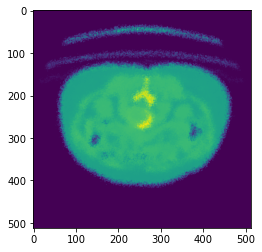

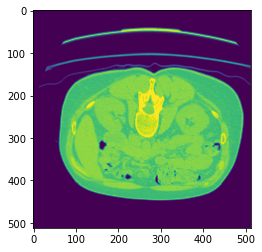

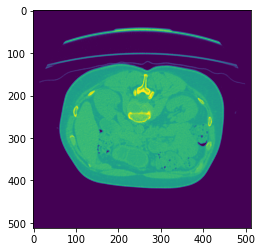

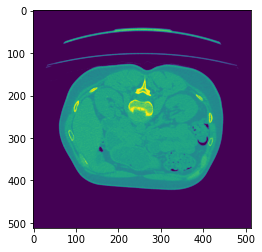

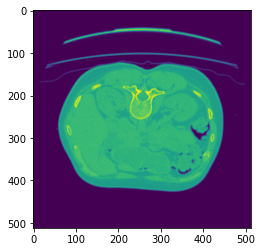

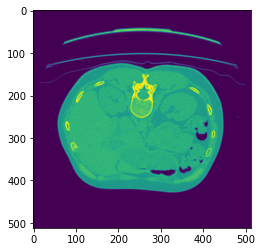

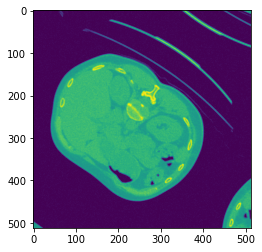

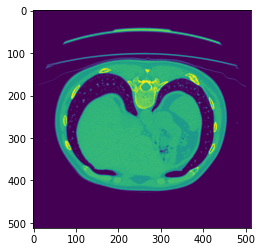

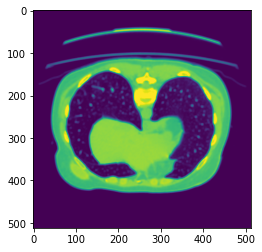

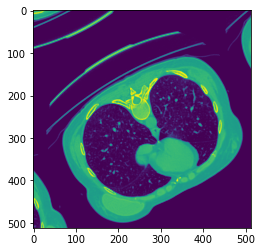

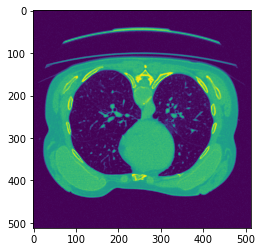

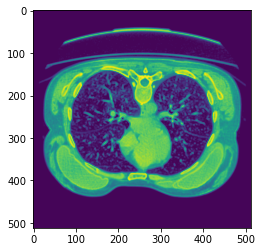

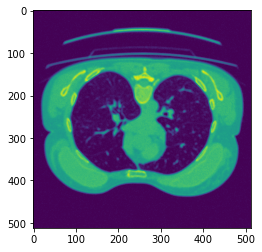

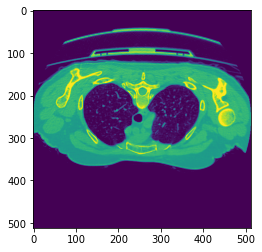

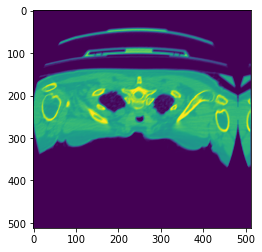

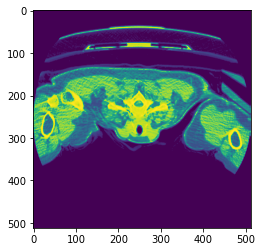

In [24]:
for i in torch.argsort(batch[1]):
    plt.imshow(batch[0][i, 0])
    plt.show()

In [9]:
with open('training_configs/model/covid_sorting.yaml') as f:
    md_config = yaml.safe_load(f)

In [10]:
from train import get_model

In [11]:
model = get_model(**md_config)

>>>>>>>>>>>>>>>> initializing model
trainable parameters in model: 11170755
<<<<<<<<<<<<<<<< done in 0.23 sec.


In [12]:
with open('training_configs/criterion/sorting.yaml') as f:
    cr_config = yaml.safe_load(f)

In [13]:
from train import get_criterion

In [14]:
criterion = get_criterion(**cr_config)

>>>>>>>>>>>>>>>> getting criterion
<<<<<<<<<<<<<<<< done in 8.5e-05 sec.


In [15]:
embedding = model(batch[0])
loss = criterion(embedding, batch[1])
print(embedding, loss)

tensor([[-0.0476],
        [-0.0466],
        [-0.0954],
        [ 0.1838],
        [-0.0712],
        [-0.0695],
        [-0.1483],
        [ 0.0337],
        [-0.1035],
        [ 0.0076],
        [-0.1178],
        [ 0.0869],
        [ 0.0843],
        [ 0.1472],
        [ 0.0464],
        [ 0.1099]], grad_fn=<SelectBackward>) tensor(0.1500, grad_fn=<MeanBackward0>)
